In [1]:
import pandas as pd 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
import statistics
from IPython.display import clear_output
import scipy
from scipy.stats import norm
from tqdm.notebook import tqdm_notebook

In [2]:
df = pd.read_csv("tarassov (2).csv") 
df.insert(2, 'a_abd', None)
df.insert(5, 'b_abd', None)
df

,MATa orf_name,MATa gene_name,a_abd,MATalpha orf_name,MATalpha_gene_name,b_abd,intensity,PPV%
0,YJR155W,AAD10,None,YCR042C,TAF2,None,21399,99.371069
1,YFL057C,AAD16,None,YHR080C,YHR080C,None,20048,98.666667
2,YJR108W,ABM1,None,YOR393W,ERR1,None,27637,99.315068
3,YJR108W,ABM1,None,YBR255C-A,YBR255C-A,None,53221,99.000000
4,YJR108W,ABM1,None,YBR296C-A,YBR296C-A,None,48548,99.000000
...,...,...,...,...,...,...,...,...
6277,YIR026C,YVH1,None,YHR146W,CRP1,None,125498,99.000000
6278,YIR026C,YVH1,None,YKL212W,SAC1,None,47003,99.000000
6279,YJL056C,ZAP1,None,YKR076W,ECM4,None,24213,99.350649
6280,YMR273C,ZDS1,None,YKR076W,ECM4,None,21283,99.315068


In [3]:
abd = pd.read_csv("abundances (1).csv") 
abd

,Unnamed: 0,Systematic Name,Standard Name,Abundances uM
0,0,YMR191W,SPG5,0.000128
1,1,YJL093C,TOK1,0.000145
2,2,YER184C,TOG1,0.000181
3,3,YGL063W,PUS2,0.000210
4,4,YPL159C,PET20,0.000265
...,...,...,...,...
5386,5386,YCR012W,PGK1,40.056802
5387,5387,YLR044C,PDC1,51.018756
5388,5388,YHR174W,ENO2,53.221692
5389,5389,YKL060C,FBA1,44.364324


In [4]:
for index, row in df.iterrows():
    if(abd['Systematic Name'].str.contains(row['MATa orf_name'], case=False).sum()>0):
        df.loc[index, 'a_abd'] = abd.loc[abd['Systematic Name'].str.contains(row['MATa orf_name'], case=False)]['Abundances uM'][:1].values[0]
    elif(abd['Standard Name'].str.contains(row['MATa orf_name'], case=False).sum()>0):
        df.loc[index, 'a_abd'] = abd.loc[abd['Standard Name'].str.contains(row['MATa orf_name'], case=False)]['Abundances uM'][:1].values[0]
    elif(abd['Systematic Name'].str.contains(row['MATa gene_name'], case=False).sum()>0):
        df.loc[index, 'a_abd'] = abd.loc[abd['Systematic Name'].str.contains(row['MATa gene_name'], case=False)]['Abundances uM'][:1].values[0]
    elif(abd['Standard Name'].str.contains(row['MATa gene_name'], case=False).sum()>0):
        df.loc[index, 'a_abd'] = abd.loc[abd['Standard Name'].str.contains(row['MATa gene_name'], case=False)]['Abundances uM'][:1].values[0]
    else:
        print('DID NOT MATCH',row['MATa orf_name'], row['MATa gene_name'])
        
#     print(row['MATa orf_name'], row['MATalpha orf_name'],row['a_abd'])

DID NOT MATCH YFL057C AAD16
DID NOT MATCH YNR002C ATO2
DID NOT MATCH YDL037C BSC1
DID NOT MATCH YNL269W BSC4
DID NOT MATCH YNL269W BSC4
DID NOT MATCH YGR109C CLB6
DID NOT MATCH YBL043W ECM13
DID NOT MATCH YLR246W ERF2
DID NOT MATCH YLR246W ERF2
DID NOT MATCH YLR246W ERF2
DID NOT MATCH YCR075C ERS1
DID NOT MATCH YCR075C ERS1
DID NOT MATCH YCR075C ERS1
DID NOT MATCH YCR075C ERS1
DID NOT MATCH YER060W-A FCY22
DID NOT MATCH YER060W-A FCY22
DID NOT MATCH YBR040W FIG1
DID NOT MATCH YOR381W FRE3
DID NOT MATCH YOR298W MUM3
DID NOT MATCH YLR273C PIG1
DID NOT MATCH YML047C PRM6
DID NOT MATCH YDL039C PRM7
DID NOT MATCH YBR033W YBR033W
DID NOT MATCH YKL037W YKL037W
DID NOT MATCH YKL037W YKL037W
DID NOT MATCH YLL016W YLL016W


In [5]:
for index, row in df.iterrows():
    if(abd['Systematic Name'].str.contains(row['MATalpha orf_name'], case=False).sum()>0):
        df.loc[index, 'b_abd'] = abd.loc[abd['Systematic Name'].str.contains(row['MATalpha orf_name'], case=False)]['Abundances uM'][:1].values[0]
    elif(abd['Standard Name'].str.contains(row['MATalpha orf_name'], case=False).sum()>0):
        df.loc[index, 'b_abd'] = abd.loc[abd['Standard Name'].str.contains(row['MATalpha orf_name'], case=False)]['Abundances uM'][:1].values[0]
    elif(abd['Systematic Name'].str.contains(row['MATa orf_name'], case=False).sum()>0):
        df.loc[index, 'b_abd'] = abd.loc[abd['Systematic Name'].str.contains(row['MATa orf_name'], case=False)]['Abundances uM'][:1].values[0]
    elif(abd['Standard Name'].str.contains(row['MATa orf_name'], case=False).sum()>0):
        df.loc[index, 'b_abd'] = abd.loc[abd['Standard Name'].str.contains(row['MATa orf_name'], case=False)]['Abundances uM'][:1].values[0]
    else:
        print('DID NOT MATCH',row['MATalpha orf_name'],row['MATalpha_gene_name'])
        
#     print(row['MATa orf_name'], row['MATalpha orf_name'],row['a_abd'])

DID NOT MATCH YBR296C-A YBR296C-A


In [6]:
df.rename(columns={'a_abd': 'Abd_A', 'b_abd': 'Abd_B','intensity':'Colony_Size'}, inplace=True)

In [7]:
df.dropna(subset=['Abd_A','Abd_B'],inplace=True)
df

,MATa orf_name,MATa gene_name,Abd_A,MATalpha orf_name,MATalpha_gene_name,Abd_B,Colony_Size,PPV%
0,YJR155W,AAD10,0.16975,YCR042C,TAF2,0.070482,21399,99.371069
2,YJR108W,ABM1,0.047681,YOR393W,ERR1,0.076074,27637,99.315068
3,YJR108W,ABM1,0.047681,YBR255C-A,YBR255C-A,0.139513,53221,99.000000
4,YJR108W,ABM1,0.047681,YBR296C-A,YBR296C-A,0.047681,48548,99.000000
5,YJR108W,ABM1,0.047681,YNL026W,SAM50,0.113214,36243,99.000000
...,...,...,...,...,...,...,...,...
6277,YIR026C,YVH1,0.209777,YHR146W,CRP1,0.482526,125498,99.000000
6278,YIR026C,YVH1,0.209777,YKL212W,SAC1,0.477681,47003,99.000000
6279,YJL056C,ZAP1,0.051394,YKR076W,ECM4,0.145381,24213,99.350649
6280,YMR273C,ZDS1,0.048409,YKR076W,ECM4,0.145381,21283,99.315068


In [8]:
pro_A=df['Abd_A'].to_list()
pro_B=df['Abd_B'].to_list()
pro_A
A_mean,A_stdev=statistics.mean(pro_A),statistics.stdev(pro_A)
print(A_mean, A_stdev)
B_mean,B_stdev=statistics.mean(pro_B),statistics.stdev(pro_B)
# mu, std = norm.fit(pro_A)
# mu,std

0.4043496087366121 0.6217405870977305


In [9]:
Ai_max,Ai_min,Aj_max,Aj_min=df['Abd_A'].max(),df['Abd_A'].min(),df['Abd_B'].max(),df['Abd_B'].min()
print(Ai_max,Ai_min,Aj_max,Aj_min)
# print(math.ceil(Ai_max),math.floor(Ai_min),math.ceil(Aj_max),math.floor(Aj_min))
Ai_max,Ai_min,Aj_max,Aj_min=math.ceil(Ai_max),math.floor(Ai_min),math.ceil(Aj_max),math.floor(Aj_min)
Ai_max,Ai_min,Aj_max,Aj_min

7.654775115349385 0.0001284026399908 7.654775115349385 0.0144076924543301


(8, 0, 8, 0)

In [10]:
df.sort_values(by=['Colony_Size'], inplace=True, ascending=False)
df=df[1:11]
df.reset_index(drop=True,inplace=True)
df

,MATa orf_name,MATa gene_name,Abd_A,MATalpha orf_name,MATalpha_gene_name,Abd_B,Colony_Size,PPV%
0,YNL190W,YNL190W,0.23103,YCL025C,AGP1,1.042684,214802,99.0
1,YJR010W,MET3,0.730392,YJR010W,MET3,0.730392,203046,99.0
2,YFL005W,SEC4,0.938091,YER136W,GDI1,0.640307,194897,99.0
3,YGR284C,ERV29,0.270923,YCL025C,AGP1,1.042684,191611,99.0
4,YNL190W,YNL190W,0.23103,YKR039W,GAP1,0.736054,191457,99.0
5,YOR054C,VHS3,0.078706,YJL002C,OST1,0.398253,190626,99.0
6,YOR270C,VPH1,1.06263,YPR036W,VMA13,0.275942,182953,99.0
7,YNL138W,SRV2,0.130933,YNL138W,SRV2,0.130933,180483,99.0
8,YNL190W,YNL190W,0.23103,YJL002C,OST1,0.398253,179079,99.0
9,YDL212W,SHR3,0.21271,YKR039W,GAP1,0.736054,176711,99.0


In [11]:
Kd = []
for i in range(len(df)):
       Kd_rand = random.uniform(1, 10**3)
       Kd.append(Kd_rand)
Kd_initial=Kd
Kd

[105.57604741062063,
 768.5230722750725,
 470.1345518609756,
 515.214305832248,
 345.65642753366865,
 853.2446124072723,
 124.06158657647553,
 228.4818696377152,
 320.9713982622141,
 191.4644255000733]

In [12]:
mu_A, sigma_A = 3.7967176508404124, 1.5635593244880654 # mean and standard deviation
mu_B, sigma_B = 4.069167482029483, 1.5642948498523275 # mean and standard deviation

In [13]:
Ai = []
for i in range(len(df)):
       Ai_rand = random.uniform(Ai_min, Ai_max)
#        Ai_rand = np.random.lognormal(mu_A, sigma_A)
       Ai.append(Ai_rand)

print(Ai_min, Ai_max)
Ai

0 8


[6.155226922993463,
 7.041118074277166,
 6.954928474235477,
 2.3669484471155053,
 3.826084932982365,
 2.227892351989982,
 3.822951489217756,
 0.37591291500628987,
 4.960016635129891,
 1.0355228803412517]

In [14]:
Aj = []
for i in range(len(df)):
       Aj_rand = random.uniform(Aj_min, Aj_max)
#        Aj_rand = np.random.lognormal(mu_B, sigma_B)
       Aj.append(Aj_rand)
    
print(Aj_min, Aj_max)
Aj

0 8


[5.199530550564975,
 2.518084734131911,
 0.0987718807724427,
 5.665639440405798,
 6.963702433972498,
 0.278755690115716,
 4.264262843112513,
 6.060640917884952,
 6.831298946613997,
 4.560712519570985]

In [15]:
# abd = pd.read_csv("tarassov_protein_abundances.csv") 
# abd

In [16]:
def fitness(Kda, Ai, Aj):
    Ki=0.00054
    a=0.1
    B=1.3
    MTX=440
    Kapp=1

    A=[]
    f_c=[]

    for i in range(len(df)):

        f_cur=(a*Kapp*Ki*Ai[i]*Aj[i])/((B*Ki*Kda[i])+(B*Kda[i]*MTX)+(Kapp*Ki*Ai[i]*Aj[i]))
        f_c.append(f_cur)
#         print(f_c)


        A.append(min(Ai[i],Aj[i])+Ai[i])
#         print(A,'\n')
    
    return A,f_c
#     print(A_total,'\n')
#     print(f_exp,'\n')
#     print(f_curr,'\n')

In [17]:
def fitness_exp(df):
    f_exp=[]
    for i in range(len(df)):
        f_exp_c=(1/345600)*math.log(df['Colony_Size'][i]/20)
        f_exp.append(f_exp_c)

    return f_exp

In [18]:
def Kd_n(Kd):
    
    ddg=random.gauss(mu, sigma)
    Kd_new=[element * math.exp(B*ddg) for element in Kd]
    return Kd_new

In [19]:
df

,MATa orf_name,MATa gene_name,Abd_A,MATalpha orf_name,MATalpha_gene_name,Abd_B,Colony_Size,PPV%
0,YNL190W,YNL190W,0.23103,YCL025C,AGP1,1.042684,214802,99.0
1,YJR010W,MET3,0.730392,YJR010W,MET3,0.730392,203046,99.0
2,YFL005W,SEC4,0.938091,YER136W,GDI1,0.640307,194897,99.0
3,YGR284C,ERV29,0.270923,YCL025C,AGP1,1.042684,191611,99.0
4,YNL190W,YNL190W,0.23103,YKR039W,GAP1,0.736054,191457,99.0
5,YOR054C,VHS3,0.078706,YJL002C,OST1,0.398253,190626,99.0
6,YOR270C,VPH1,1.06263,YPR036W,VMA13,0.275942,182953,99.0
7,YNL138W,SRV2,0.130933,YNL138W,SRV2,0.130933,180483,99.0
8,YNL190W,YNL190W,0.23103,YJL002C,OST1,0.398253,179079,99.0
9,YDL212W,SHR3,0.21271,YKR039W,GAP1,0.736054,176711,99.0


In [20]:
df['Abd_A'].sum()

4.117474630488058

In [21]:
def cost(A_total, f_exp, f_curr):
    f_sub=0
    A_sub=0
    for i in range(len(df)):
        f_sub+=(f_curr[i]-f_exp[i])**2
        A_sub=(A_total[i]-df['Abd_A'][i])**1

#     print(f_sub,A_sub)
    cost=f_sub+A_sub
    return cost
#     print('Cost: ',cost)
#     print(f_sub)
#     print(A_sub**2)

In [22]:
# mu = 1
# sigma = 1.7
# B=-0.01

# f_exp=fitness_exp(df)
# Kd_new=Kd_n(Kd)
# A_total, f_curr=fitness(Kd, Ai, Aj)
# A_total_new, f_curr_new=fitness(Kd_new, Ai, Aj)
# C_old=cost(A_total, f_exp, f_curr)
# print('\n\n')
# C_new=cost(A_total_new, f_exp, f_curr_new)
# print(Kd,'\n\n',Kd_new,'\n\n',f_curr,'\n\n',f_curr_new,'\n\n',C_old,'\n\n',C_new)

In [23]:
A_total, f_curr=fitness(Kd, Ai, Aj)
A_total, f_curr

([11.354757473558438,
  9.559202808409076,
  7.05370035500792,
  4.733896894231011,
  7.65216986596473,
  2.506648042105698,
  7.645902978435512,
  0.7518258300125797,
  9.920033270259783,
  2.0710457606825035],
 [2.8618039442898686e-08,
  2.1779717666488878e-09,
  1.3794342938916532e-10,
  2.4572367704671556e-09,
  7.276915649321835e-09,
  6.871342349586294e-11,
  1.2405165610816782e-08,
  9.413502676343983e-10,
  9.96591651329032e-09,
  2.3286353819581057e-09])

In [24]:
f_exp=fitness_exp(df)
f_exp

[2.685688564527336e-05,
 2.6694026504007606e-05,
 2.6575504106811967e-05,
 2.6526302895226932e-05,
 2.652397640553916e-05,
 2.6511390042470202e-05,
 2.6392512426741455e-05,
 2.6353181701215614e-05,
 2.633058464898387e-05,
 2.6292067810247114e-05]

In [25]:
Kd

[105.57604741062063,
 768.5230722750725,
 470.1345518609756,
 515.214305832248,
 345.65642753366865,
 853.2446124072723,
 124.06158657647553,
 228.4818696377152,
 320.9713982622141,
 191.4644255000733]

In [26]:
df

,MATa orf_name,MATa gene_name,Abd_A,MATalpha orf_name,MATalpha_gene_name,Abd_B,Colony_Size,PPV%
0,YNL190W,YNL190W,0.23103,YCL025C,AGP1,1.042684,214802,99.0
1,YJR010W,MET3,0.730392,YJR010W,MET3,0.730392,203046,99.0
2,YFL005W,SEC4,0.938091,YER136W,GDI1,0.640307,194897,99.0
3,YGR284C,ERV29,0.270923,YCL025C,AGP1,1.042684,191611,99.0
4,YNL190W,YNL190W,0.23103,YKR039W,GAP1,0.736054,191457,99.0
5,YOR054C,VHS3,0.078706,YJL002C,OST1,0.398253,190626,99.0
6,YOR270C,VPH1,1.06263,YPR036W,VMA13,0.275942,182953,99.0
7,YNL138W,SRV2,0.130933,YNL138W,SRV2,0.130933,180483,99.0
8,YNL190W,YNL190W,0.23103,YJL002C,OST1,0.398253,179079,99.0
9,YDL212W,SHR3,0.21271,YKR039W,GAP1,0.736054,176711,99.0


Progress:   0%|          | 0/400000 [00:00<?, ?it/s]

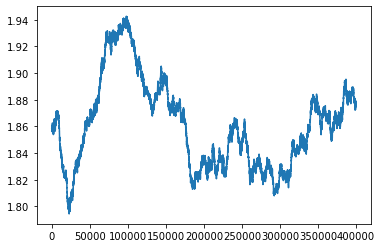

In [27]:
t=0

mu = 1
sigma = 1.7
B=0.001
Ai_max,Ai_min=max(Ai),min(Ai)
Aj_max,Aj_min=max(Aj),min(Aj)

dC_array=[]
dC_sq_array=[]
C_new_array=[]
C_old_array=[]
Ai_track=[]
Aj_track=[]
Kd_track=[]
test=[]
C_new=0



# while(t<7000):
for t in tqdm_notebook(range(400000),desc='Progress'):
    
    f_exp=fitness_exp(df)
    Kd_new=Kd_n(Kd)
    
    Ai_len=len(Ai)
    Ai_pos=random.randint(0,Ai_len-1)
    E_a=random.gauss(0, 0.0001)
    temp_Ai=Ai[Ai_pos]*(10**E_a)
    Ai_tmp=Ai
    if(temp_Ai<Ai_max and temp_Ai>Ai_min):
        Ai_tmp[Ai_pos]=temp_Ai

    Aj_len=len(Aj)
    Aj_pos=random.randint(0,Aj_len-1)
    E_b=random.gauss(0, 0.0001)
    temp_Aj=Aj[Aj_pos]*(10**E_b)
    Aj_tmp=Aj
    if(temp_Aj<Aj_max and temp_Aj>Aj_min):
        Aj_tmp[Aj_pos]=temp_Aj
        
        
    A_total, f_curr=fitness(Kd, Ai, Aj)#comment this
    A_total_new, f_curr_new=fitness(Kd_new, Ai_tmp, Aj_tmp)
    C_old=cost(A_total, f_exp, f_curr)
    C_new=cost(A_total_new, f_exp, f_curr_new)
    dC=C_new-C_old
    
    C_old_array.append(C_old)
    C_new_array.append(C_new)
    dC_array.append(dC)
    dC_sq_array.append(dC**2)
    Ai_track.append(Ai.copy())
    Aj_track.append(Aj.copy())
    Kd_track.append(Kd)

#     print('**',Ai_track,'\n\n')
#     print(t,dC)
    
#     print(Kd,'\n\n',Kd_new,'\n\n',A_total,'\n\n',A_total_new,'\n\n',C_new,C_old,dC)
#     test.append(np.exp(B*dC))
    if(random.random()<=np.exp(-B*dC)): ##np. or math.
#         print('1')
#         C_new=cost(A_total_new, f_exp, f_curr_new)
        Kd_new_temp=Kd_new
        Ai=Ai_tmp
        Aj=Aj_tmp

#         print(t,Ai,'\n',Aj,'\n\n')

#         Ai_len=len(Ai)
#         Ai_pos=random.randint(0,Ai_len-1)
#         E_a=random.gauss(0, 0.0001)
#         temp_Ai=Ai[Ai_pos]*(10**E_a)
#         if(temp_Ai<Ai_max and temp_Ai>Ai_min):
#             Ai[Ai_pos]=temp_Ai
                
#         Aj_len=len(Aj)
#         Aj_pos=random.randint(0,Aj_len-1)
#         E_b=random.gauss(0, 0.0001)
#         temp_Aj=Aj[Aj_pos]*(10**E_b)
#         if(temp_Aj<Aj_max and temp_Aj>Aj_min):
#             Aj[Aj_pos]=temp_Aj

#         print(Ai_pos,Aj_pos)
#         print(Ai,'\n',temp_Ai,'\n',Aj,'\n',temp_Aj,'\n\n')

    else:
#         print('2')
        Kd_new_temp=Kd
        Ai_tmp=Ai
        Aj_tmp=Aj
#         Ai=Ai_tmp
#         Aj=Aj_tmp
    
#         Ai_max,Ai_min=max(Ai),min(Ai)
#         E_a=random.gauss(0, 0.0001)
#         Ai=[(element*(10**E_a) if (element*(10**E_a)>Ai_min and element*(10**E_a)<Ai_max) else element) for element in Ai]
        
#         Aj_max,Aj_min=max(Aj),min(Aj)
#         E_b=random.gauss(0, 0.0001)
#         Aj=[(element*(10**E_b) if (element*(10**E_b)>Aj_min and element*(10**E_b)<Aj_max) else element) for element in Aj]

    Kd=Kd_new_temp
    t=t+1
#     print(t,'out',Ai,'\n',Aj,'\n\n\n')

    
#     count=0
#     x=[]
#     y=C_new_array

#     for a in range(len(y)):
#         x.append(a)

#     plt.plot(x,y)
#     plt.show()
#     clear_output(wait=False)

#     print(t,B,dC)
#     if dC<=math.exp(-3):
#         break
    
# print(Kd,'\n\n', Kd_new,'\n\n', Kd_new_temp,'\n\n',dC,'\n TIME:',t)

count=0
x=[]
y=C_new_array

for a in range(len(y)):
    x.append(a)
    
plt.plot(x,y)
plt.show()

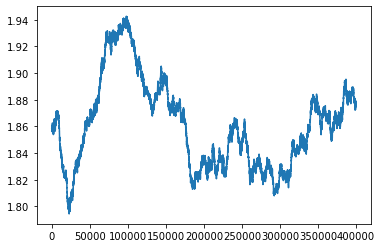

In [28]:
count=0
x=[]
y=C_old_array

for a in range(len(y)):
    x.append(a)
    
plt.plot(x,y)
plt.show()

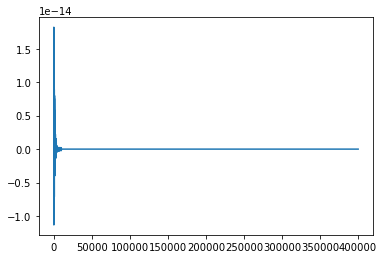

In [29]:
count=0
x=[]
y=dC_array

for a in range(len(y)):
    x.append(a)
    
plt.plot(x,y)
plt.show()

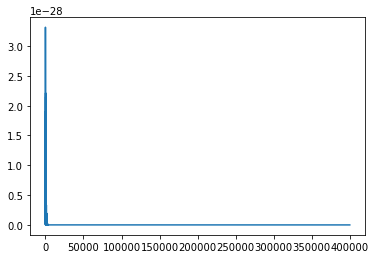

In [30]:
count=0
x=[]
y=dC_sq_array

for a in range(len(y)):
    x.append(a)
    
plt.plot(x,y)
plt.show()

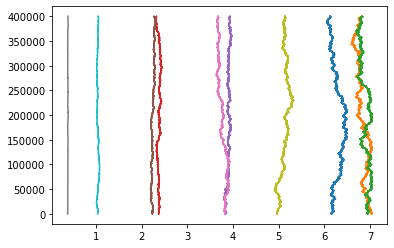

In [31]:
rng=np.arange(0,len(Ai_track))
plt.plot(Ai_track,rng)

In [32]:
# t,Ai_track

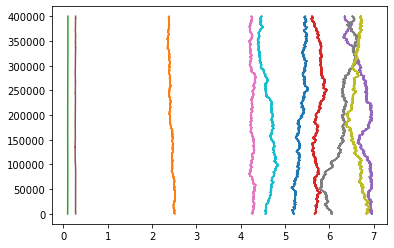

In [33]:
rng=np.arange(0,len(Aj_track))
plt.plot(Aj_track,rng)

In [34]:
# Aj_track

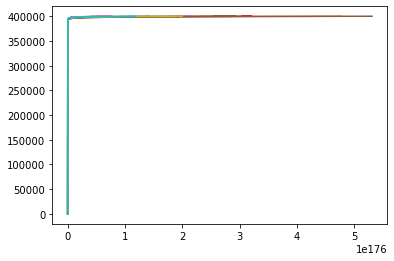

In [35]:
rng=np.arange(0,len(Kd_track))
plt.plot(Kd_track,rng)

In [36]:
Kd_initial

[105.57604741062063,
 768.5230722750725,
 470.1345518609756,
 515.214305832248,
 345.65642753366865,
 853.2446124072723,
 124.06158657647553,
 228.4818696377152,
 320.9713982622141,
 191.4644255000733]

In [37]:
Kd

[6.570675895466624e+175,
 4.78301295602357e+176,
 2.925949439577194e+176,
 3.2065097182175963e+176,
 2.1512420783049748e+176,
 5.310289545010281e+176,
 7.72114979168417e+175,
 1.421989504438188e+176,
 1.9976112777675864e+176,
 1.1916061609881079e+176]